In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'best-selling game consoles.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print(data.head())

      Console Name      Type   Company  Released Year  Discontinuation Year  \
0    PlayStation 2      Home      Sony           2000                  2013   
1      Nintendo DS  Handheld  Nintendo           2004                  2013   
2  Nintendo Switch    Hybrid  Nintendo           2017                     0   
3         Game Boy  Handheld  Nintendo           1989                  2003   
4    PlayStation 4      Home      Sony           2013                     0   

   Units sold (million)                                            Remarks  
0                158.70           Final sales are greater than 155 million  
1                154.02                                                NaN  
2                143.42                                                NaN  
3                118.69  The Game Boy (1989) and the Game Boy Color (19...  
4                117.20                                                NaN  


In [4]:
# Basic statistics
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
       Released Year  Discontinuation Year  Units sold (million)
count      50.000000             50.000000             50.000000
mean     1996.020000           1841.640000             38.103000
std        12.500596            548.702319             45.494762
min      1976.000000              0.000000              1.000000
25%      1987.250000           1992.000000              3.425000
50%      1993.500000           1998.000000             14.690000
75%      2004.750000           2012.250000             61.382500
max      2020.000000           2020.000000            158.700000


In [5]:
# Data cleaning: Convert 'Units Sold (million)' to numeric
data['Units sold (million)'] = pd.to_numeric(data['Units sold (million)'], errors='coerce')

<ipython-input-7-ee35a1e7df3f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Type', y='Units sold (million)', data=data, estimator=sum, ci=None)


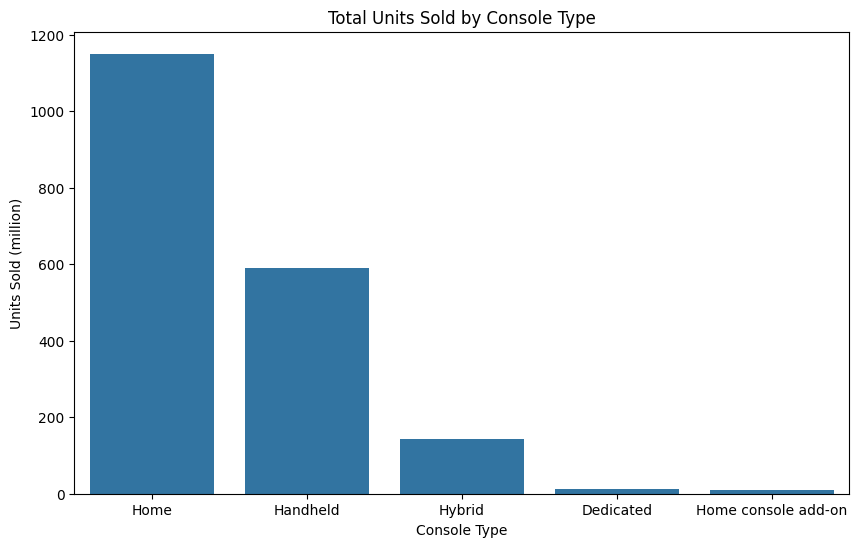

In [7]:
# Plot units sold by console type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Units sold (million)', data=data, estimator=sum, ci=None)
plt.title('Total Units Sold by Console Type')
plt.xlabel('Console Type')
plt.ylabel('Units Sold (million)')
plt.show()

<ipython-input-8-8e2fdbb26048>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company', y='Units sold (million)', data=data, estimator=sum, ci=None)


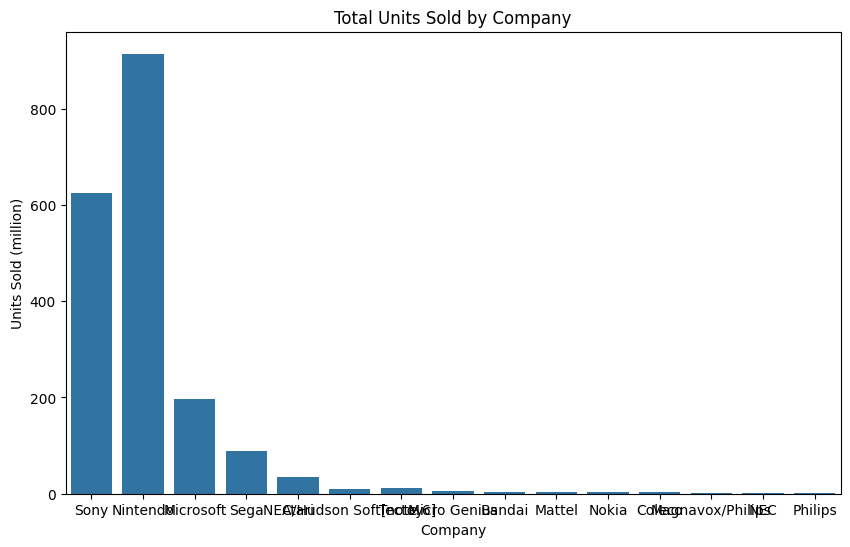

In [8]:
# Plot units sold by company
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Units sold (million)', data=data, estimator=sum, ci=None)
plt.title('Total Units Sold by Company')
plt.xlabel('Company')
plt.ylabel('Units Sold (million)')
plt.show()

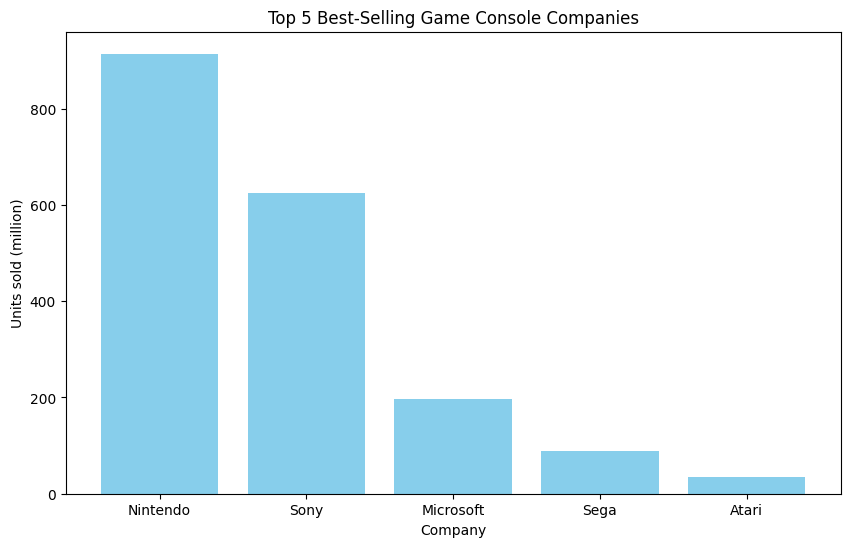

In [12]:
# Group by company and sum the units sold
company_sales = data.groupby('Company')['Units sold (million)'].sum().reset_index()

# Sort by units sold and get the top 5 companies
top_5_companies = company_sales.sort_values(by='Units sold (million)', ascending=False).head(5)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies['Company'], top_5_companies['Units sold (million)'], color='skyblue')
plt.title('Top 5 Best-Selling Game Console Companies')
plt.xlabel('Company')
plt.ylabel('Units sold (million)')
plt.show()

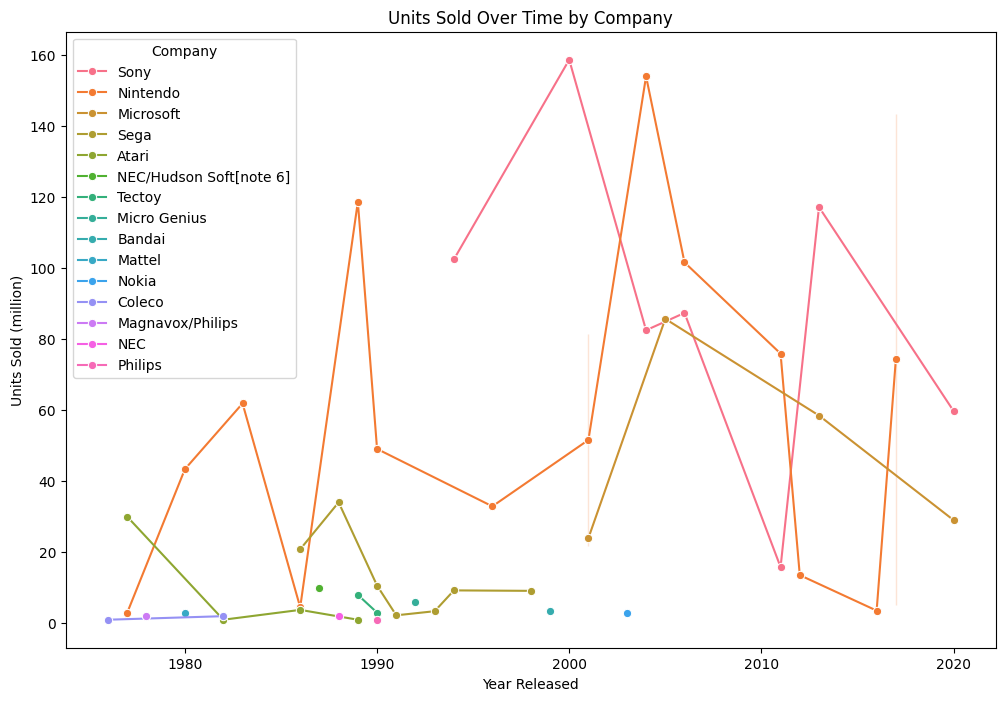

In [10]:
# Plot units sold over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Released Year', y='Units sold (million)', hue='Company', data=data, marker='o')
plt.title('Units Sold Over Time by Company')
plt.xlabel('Year Released')
plt.ylabel('Units Sold (million)')
plt.show()